In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op


In [2]:
filename = 'ex1data2.txt'
data = np.loadtxt(filename, delimiter=',')#b=np.linalg.inv(a)
data

array([[  2.10400000e+03,   3.00000000e+00,   3.99900000e+05],
       [  1.60000000e+03,   3.00000000e+00,   3.29900000e+05],
       [  2.40000000e+03,   3.00000000e+00,   3.69000000e+05],
       [  1.41600000e+03,   2.00000000e+00,   2.32000000e+05],
       [  3.00000000e+03,   4.00000000e+00,   5.39900000e+05],
       [  1.98500000e+03,   4.00000000e+00,   2.99900000e+05],
       [  1.53400000e+03,   3.00000000e+00,   3.14900000e+05],
       [  1.42700000e+03,   3.00000000e+00,   1.98999000e+05],
       [  1.38000000e+03,   3.00000000e+00,   2.12000000e+05],
       [  1.49400000e+03,   3.00000000e+00,   2.42500000e+05],
       [  1.94000000e+03,   4.00000000e+00,   2.39999000e+05],
       [  2.00000000e+03,   3.00000000e+00,   3.47000000e+05],
       [  1.89000000e+03,   3.00000000e+00,   3.29999000e+05],
       [  4.47800000e+03,   5.00000000e+00,   6.99900000e+05],
       [  1.26800000e+03,   3.00000000e+00,   2.59900000e+05],
       [  2.30000000e+03,   4.00000000e+00,   4.4990000

In [14]:
X_no1 = data[:,0:2]
y = data[:, 2:]

In [17]:
def featurenormal(X):
    std = np.std(X, axis=0)
    mean = np.mean(X, axis=0)
    X_change = (X - np.tile(mean, (X.shape[0], 1)))/np.tile(std,(X.shape[0], 1))
    return X_change, mean, std
[X, mean, std] = featurenormal(X_no1)
X = np.c_[np.ones((X.shape[0], 1)), X]

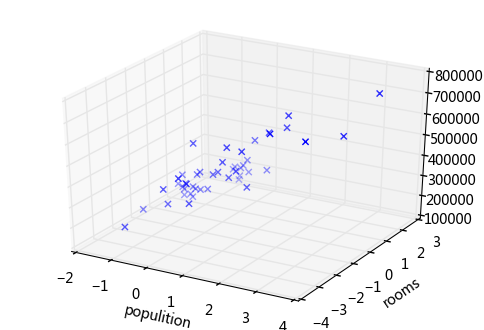

In [18]:
#plt data
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(111, projection='3d')
ax.scatter(X[:, 1:2], X[:, 2:],y, marker = 'x')
plt.xlabel('populition')
plt.ylabel('rooms')
plt.show()

In [19]:
theta = np.zeros((X.shape[1], 1))

In [20]:
def costfunction(theta, X, y):
    m = len(y)
    h = X.dot(theta)
    J = 1/(2*m)*(h-y).T.dot(h-y)
    return J

In [21]:
costfunction(theta, X, y)

array([[  6.55915481e+10]])

In [22]:
def gradientdescent(theta, X, y,alpha, iter_nums ):
    i = 0
    m = len(y)
    cost_hist = []
    while i<iter_nums:
        h = X.dot(theta)
        theta = theta - alpha*1/m * X.T.dot(h-y)
        cost = costfunction(theta, X, y)[0, 0]
        cost_hist.append(cost)
        i += 1
    return cost_hist, theta

In [40]:
out = gradientdescent(theta, X, y, 0.01, 8000)
cost = out[0]
theta_optim = out[1]
print(theta_optim)#fprintf(' -3.6303\n  1.1664\n\n')

[[ 340412.65957447]
 [ 109447.79646964]
 [  -6578.35485416]]


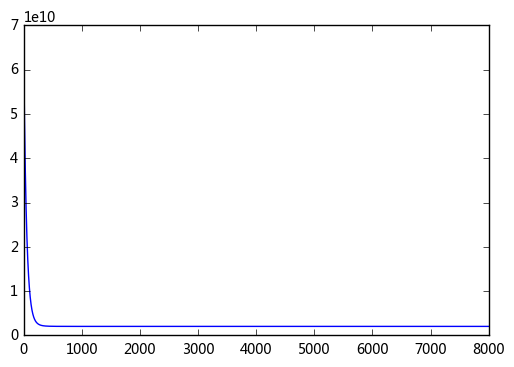

In [41]:
plt.plot(cost)
plt.show()

In [42]:
sb=(np.array([[1650,3]])-mean) / std
price = np.c_[np.ones((1,1)),sb].dot(theta_optim) 
price#293081.464335


array([[ 293081.46433489]])

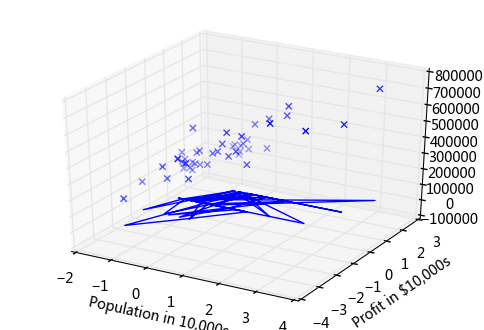

In [30]:
ax1 = plt.subplot(111, projection='3d')
ax1.scatter(X[:,1:2], X[:,2:3], y,marker='x', )
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population in 10,000s')
ax1.plot(X[:,1:2],X[:,2:3],X.dot(theta_optim),'r') 
plt.show()